### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data 


In [3]:
# df = pd.read_csv('M2_SENSORY_format.csv')
# here i use the filled blank value
df = pd.read_csv('SENSORY_mod.csv')
print(df)

    Sample Fiber_Type  Pressure  Concentrate  Replicate  Thick  Grainy  \
0        1     Potato        50            3          1    6.4     1.6   
1        2     Potato        50            3          2    6.4     1.7   
2        3     Potato        50            3          3    7.0     1.6   
3        4     Potato        90            3          1    7.3     1.5   
4        5     Potato        90            3          2    7.1     1.3   
5        6     Potato        90            3          3    7.1     1.1   
6        7     Tomato        50            2          1    4.9     0.0   
7        8     Tomato        50            2          2    4.8     0.0   
8        9     Tomato        50            2          3   50.0     0.0   
9       10     Tomato        50            3          1    5.1     0.3   
10      11     Tomato        50            3          2    4.4     0.2   
11      12     Tomato        50            3          3    5.4     0.2   
12      13     Tomato        90       

### Plotting data

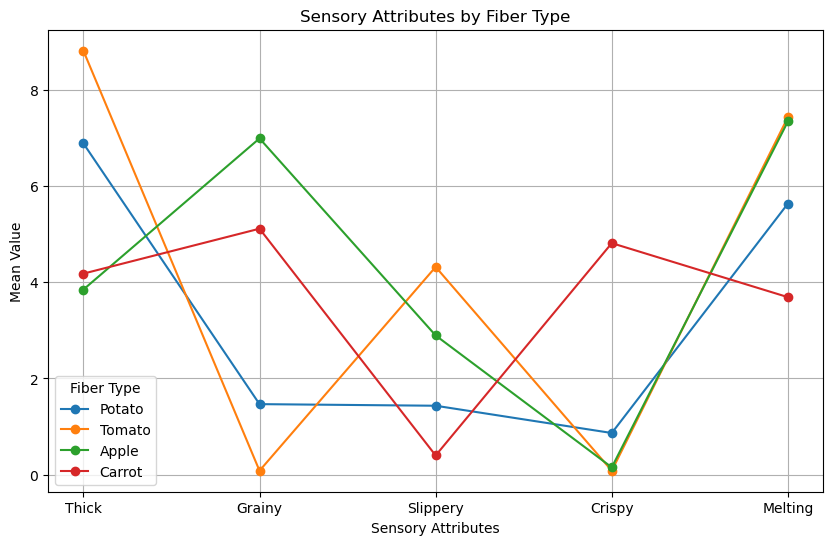

In [4]:
# Step 2: Ensure 'Fiber Type' is treated as categorical
df['Fiber_Type'] = df['Fiber_Type'].astype('category')

# Step 3: Define the fiber types and variables to plot
fiber_types = df['Fiber_Type'].unique()  # Extract unique fiber types from the data
sensory_variables = ["Thick", "Grainy", "Slippery", "Crispy", "Melting"]

# Step 4: Plot each fiber type's sensory data
plt.figure(figsize=(10, 6))  # Create a figure with a specific size

for fiber in fiber_types:
    # Filter the dataframe for each fiber type
    fiber_data = df[df['Fiber_Type'] == fiber]
    
    # Calculate the mean of each sensory variable
    mean_values = fiber_data[sensory_variables].mean()
    
    # Plot the sensory variables for the current fiber type
    plt.plot(sensory_variables, mean_values, marker='o', label=fiber)

# Step 5: Add labels, title, and legend
plt.xlabel('Sensory Attributes')
plt.ylabel('Mean Value')
plt.title('Sensory Attributes by Fiber Type')
plt.legend(title='Fiber Type')

# Step 6: Show the plot
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

### Plots for each fiber type

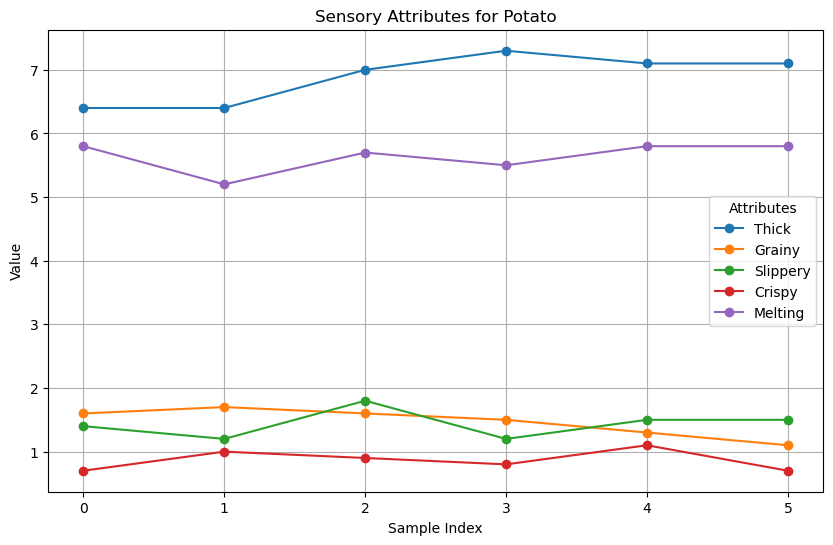

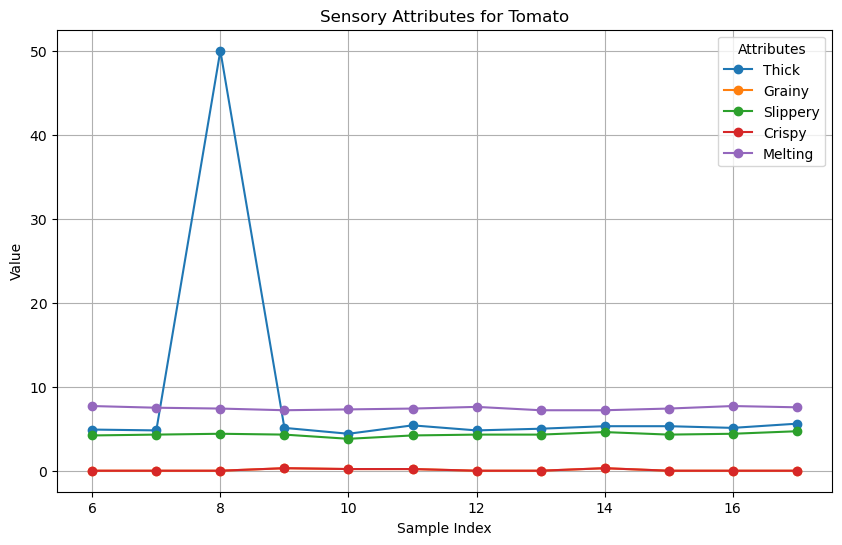

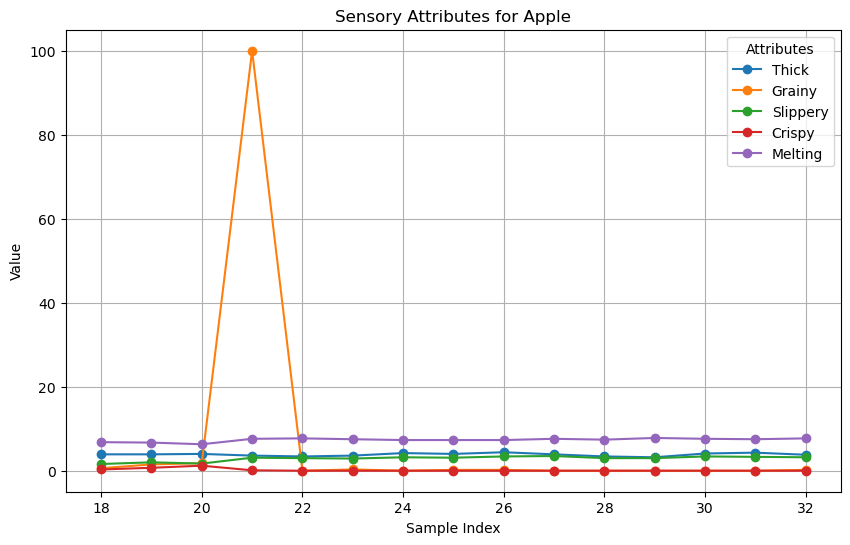

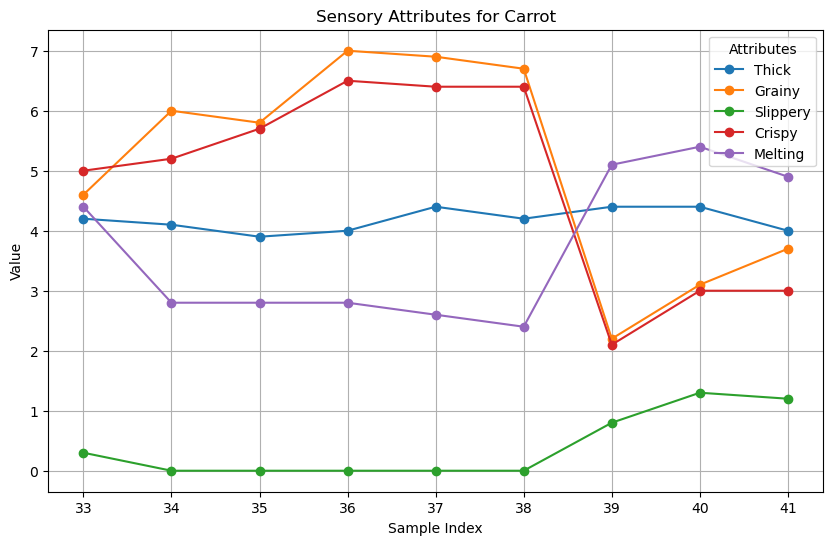

In [5]:
df['Fiber_Type'] = df['Fiber_Type'].astype('category')

# Step 3: Define the sensory variables to plot
sensory_variables = ["Thick", "Grainy", "Slippery", "Crispy", "Melting"]

# Step 4: Loop through each fiber type and plot the data
fiber_types = df['Fiber_Type'].unique()  # Extract unique fiber types from the data

for fiber in fiber_types:
    fiber_data = df[df['Fiber_Type'] == fiber]
    
    plt.figure(figsize=(10, 6))
    for variable in sensory_variables:
        plt.plot(fiber_data.index, fiber_data[variable], marker='o', linestyle='-', label=variable)
    
    plt.xlabel('Sample Index')  # or any other x-axis variable
    plt.ylabel('Value')
    plt.title(f'Sensory Attributes for {fiber}')
    plt.legend(title='Attributes')
    plt.grid(True)
    plt.show()

## Outlier stat


In [6]:
%pip install outlier-utils
from OUTLIERS import smirnov_grubbs as grubbs

Note: you may need to restart the kernel to use updated packages.


In [8]:
sensory_variables = ["Thick", "Grainy", "Slippery", "Crispy", "Melting"]
for var in sensory_variables:
  data = df[var].tolist()
  result = grubbs.max_test_indices(data, alpha=0.05)
  print(f'the index of outlier in variable {var} is {result}')

the index of outlier in variable Thick is [8]
the index of outlier in variable Grainy is [21]
the index of outlier in variable Slippery is []
the index of outlier in variable Crispy is []
the index of outlier in variable Melting is []


the index of outlier in variable Thick is [8]
the index of outlier in variable Grainy is [21]

### cluster plot

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, ward

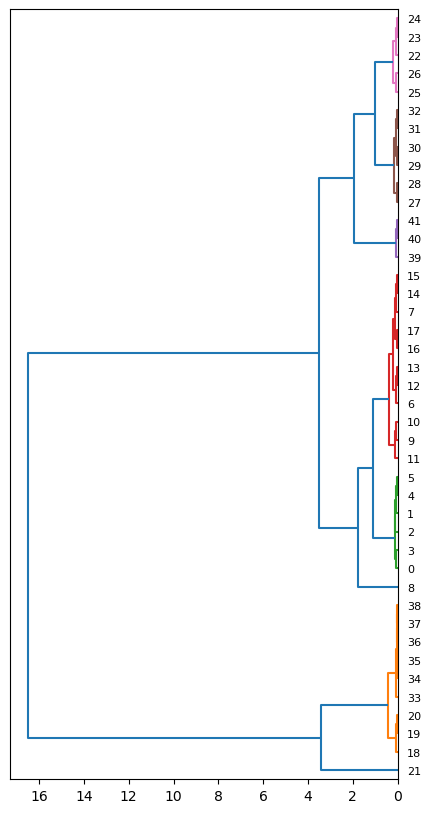

In [18]:
# df_new = df.drop['Fiber_Types']
# Convert categorical column to numeric
le = LabelEncoder()
df['Fiber_Type'] = le.fit_transform(df['Fiber_Type'])
df_numeric = df.select_dtypes(include=[np.number])
fix, aix = plt.subplots(figsize=(5,10))
dist_matrix = cosine_similarity(df)
linkage_matrix = ward(dist_matrix)
ax = dendrogram(linkage_matrix,color_threshold=0.7, labels=df.index, orientation="left")
